In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils

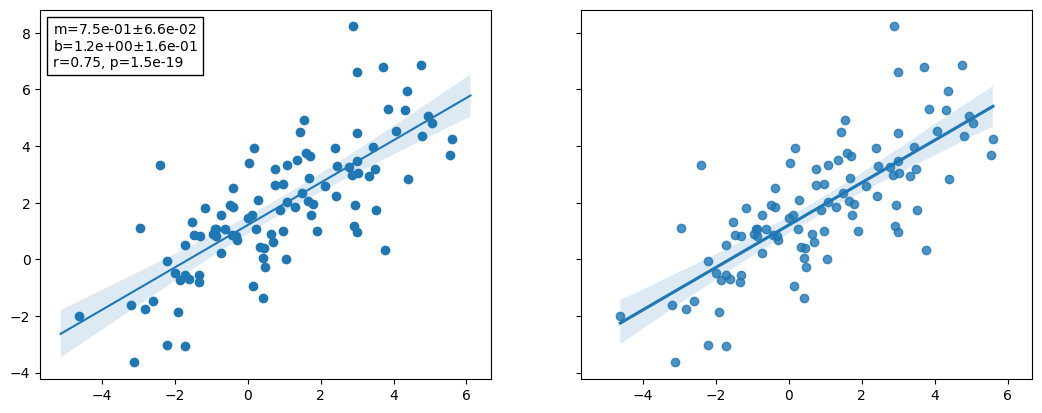

In [4]:
mean = np.array([1,2])
U = 1/(2**0.5)*np.array([[1,-1],[1,1]])
S = np.diag(np.array([3,1]))**2
cov = U @ S @ U.T
x = np.random.multivariate_normal(mean,cov,size=100)

fig, axes = utils.plot.subplots(1, 2, sharex=True, sharey=True)

utils.plot.regplot(x[:,0], x[:,1], text_kwargs={'loc': 'upper left'}, ax=axes[0])

sns.regplot(x=x[:,0], y=x[:,1], ax=axes[1])

plt.show()

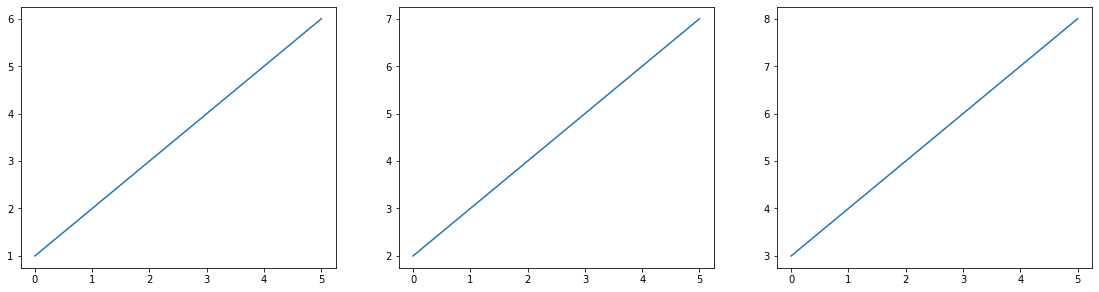

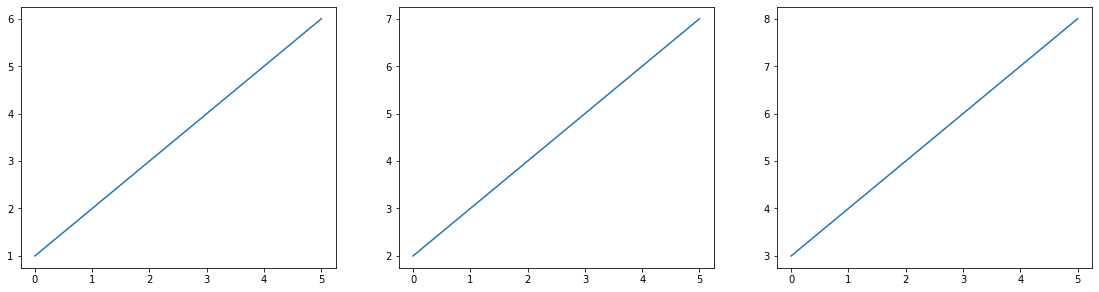

In [10]:
fig, axes = utils.plot.subplots(1,3,keep_shape=True)
x, y = np.linspace(0,5), np.linspace(1,6)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].plot(x, y+j)
plt.show()

fig, axes = utils.plot.subplots(1,3,keep_shape=False)
x, y = np.linspace(0,5), np.linspace(1,6)
for j in range(axes.shape[0]):
    axes[j].plot(x, y+j)
plt.show()

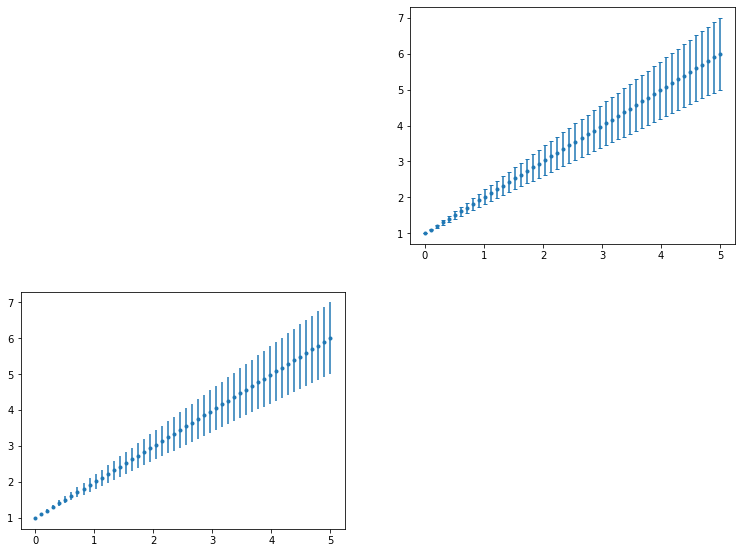

In [61]:
fig, axes = utils.plot.subplots(2,2)
x, y, yerr = np.linspace(0,5), np.linspace(1,6), np.linspace(0,1)
utils.plot.scaterr(x, y, yerr, ax=axes[0,1], cap=True)
utils.plot.scaterr(x, y, yerr, ax=axes[1,0])
utils.plot.hide_unused_axes(axes)
plt.show()